In [1]:
# 每行代表一个App，各字段之间由逗号分隔，顺序依次为：“appID，appCategory”。
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
path = '~/codedata/tpai/pre/'

In [2]:
appcategory = pd.read_csv(path + 'app_categories.csv')
train = pd.read_csv(path + 'train.csv')
ad = pd.read_csv(path + 'ad.csv')
# appId在creativeID的标号内
train = pd.merge(train, ad, on='creativeID',how='left')
train = pd.merge(train,appcategory,on='appID',how='left')

In [3]:
train.head()

,label,clickTime,conversionTime,creativeID,userID,positionID,connectionType,telecomsOperator,adID,camgaignID,advertiserID,appID,appPlatform,appCategory
0,0,170000,NaN,3089,2798058,293,1,1,1321,83,10,434,1,108
1,0,170000,NaN,1259,463234,6161,1,2,1535,685,80,14,2,2
2,0,170000,NaN,4465,1857485,7434,4,1,147,460,3,465,1,209
3,0,170000,NaN,1004,2038823,977,1,1,411,564,3,465,1,209
4,0,170000,NaN,1887,2015141,3688,1,1,369,144,84,360,1,201


<class 'pandas.core.series.Series'>


appCategory
0      0.423841
407    0.203723
203    0.096585
106    0.044643
402    0.037568
104    0.034928
503    0.031987
201    0.031498
101    0.030474
301    0.028042
209    0.020328
2      0.015487
108    0.006938
408    0.000000
Name: label, dtype: float64

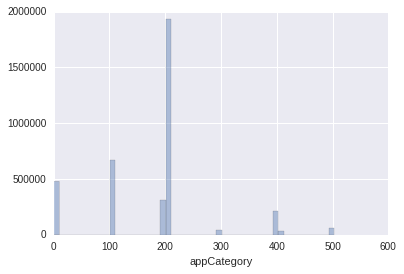

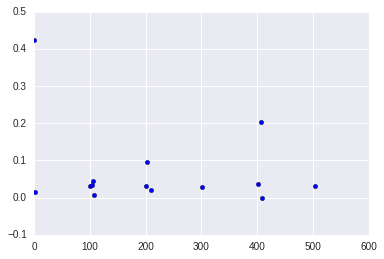

In [16]:
# appID其实只有app类别属性，应该可以被替代
var = 'appCategory'
sns.distplot(train[var],kde=False)
fig = plt.figure()
means = train.groupby(var)['label'].mean()
plt.xlim(0,600)
plt.scatter(x=means.index, y=means.values)
print type(means)
means.sort_values(ascending=False)
# sns.jointplot(x=means.index,y=means.values, xlim=(0,600), dropna=False)
# data = pd.concat([appcategory['appID'], appcategory['appCategory']], axis = 1)
# data.plot.scatter(x='appID', y='appCategory')

<class 'pandas.core.series.Series'>


appPlatform
2    0.025866
1    0.024596
Name: label, dtype: float64

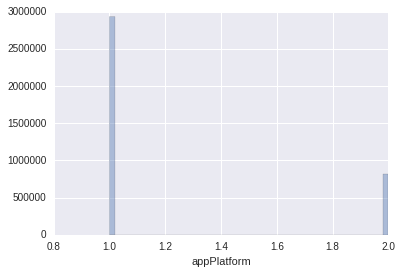

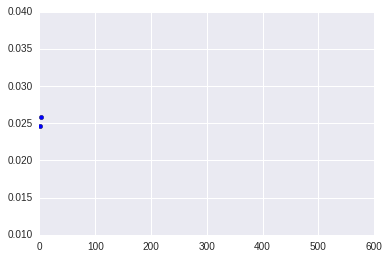

In [18]:
# appID其实只有app类别属性，应该可以被替代
var = 'appPlatform'
sns.distplot(train[var],kde=False)
fig = plt.figure()
means = train.groupby(var)['label'].mean()
plt.xlim(0,600)
plt.scatter(x=means.index, y=means.values)
print type(means)
means.sort_values(ascending=False)
# sns.jointplot(x=means.index,y=means.values, xlim=(0,600), dropna=False)
# data = pd.concat([appcategory['appID'], appcategory['appCategory']], axis = 1)
# data.plot.scatter(x='appID', y='appCategory')

             appCategory     label
appCategory     1.000000  0.043988
label           0.043988  1.000000


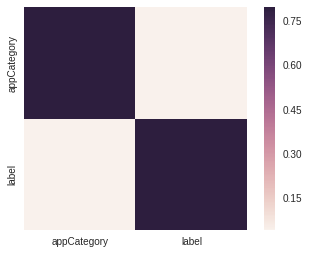

In [6]:
feats = ['appCategory', 'label']
corr = train[feats].corr()
fig = plt.figure()
print corr
sns.heatmap(corr, vmax=.8, square=True)
